## Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [2]:
# Generate dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=42
)

In [3]:
# Train SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X, y)

SVC(kernel='linear')

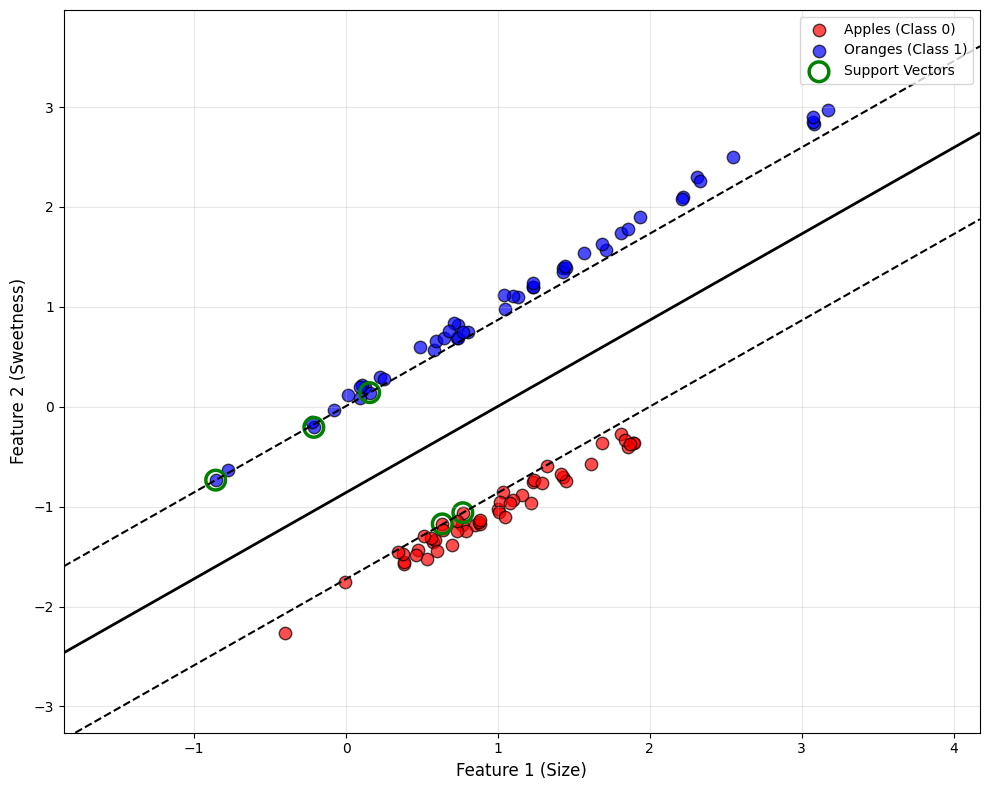

In [5]:
# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Calculate decision function values
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Apples (Class 0)', 
            edgecolors='k', s=80, alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Oranges (Class 1)', 
            edgecolors='k', s=80, alpha=0.7)

# Plot decision boundary (hyperplane where decision_function = 0)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, 
            linestyles='solid')

# Plot margins (where decision_function = -1 and +1)
plt.contour(xx, yy, Z, levels=[-1, 1], colors='black', linewidths=1.5, 
            linestyles='dashed')

# Highlight support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], 
            svm_classifier.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='green', linewidths=2.5,
            label='Support Vectors')

plt.xlabel('Feature 1 (Size)', fontsize=12)
plt.ylabel('Feature 2 (Sweetness)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()